<a href="https://colab.research.google.com/github/sohamrane10/IrisFlowerClassification/blob/main/IrisFlowersClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

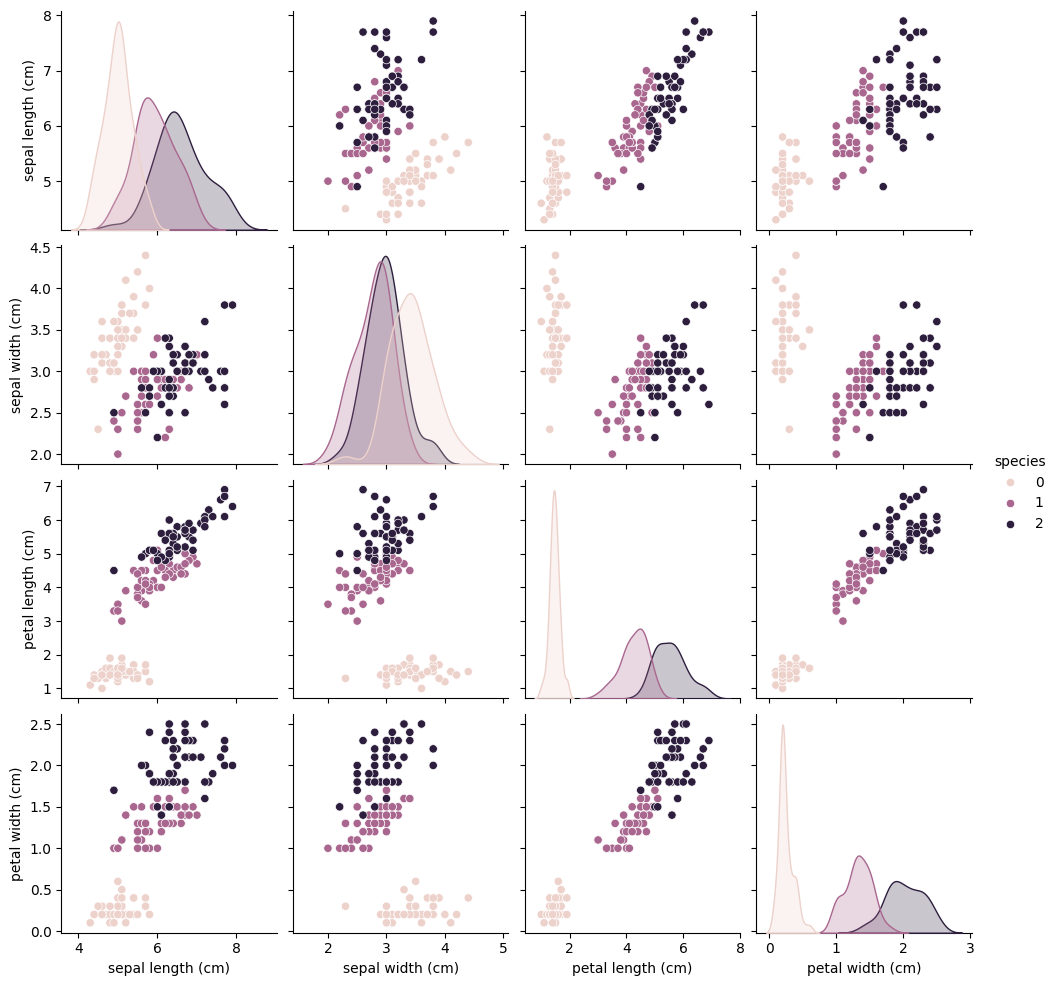

Logistic Regression - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


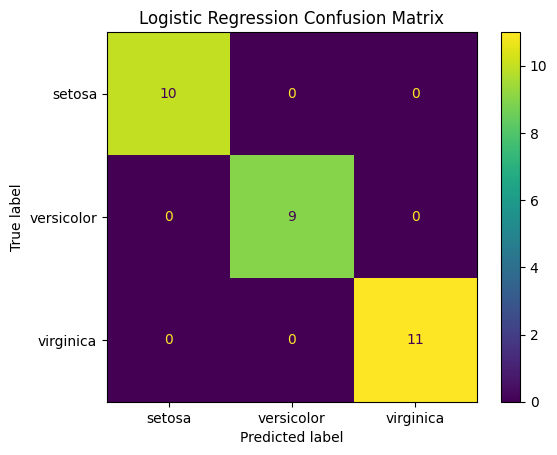

Decision Tree - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


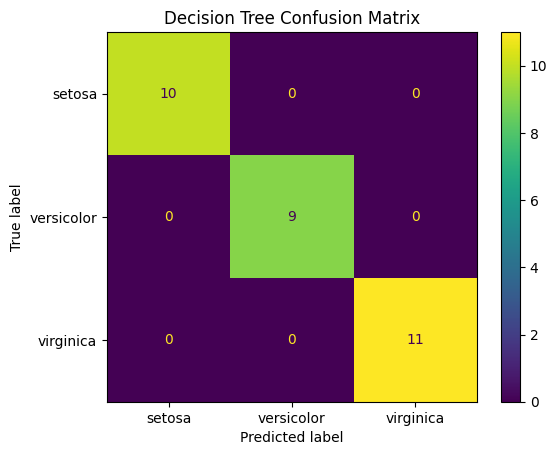

K-Nearest Neighbors - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


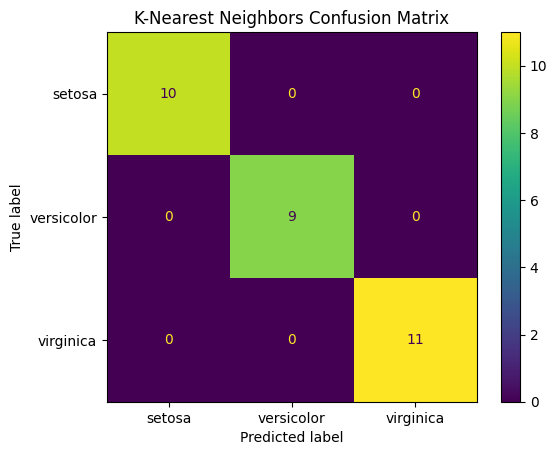

Support Vector Machine - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


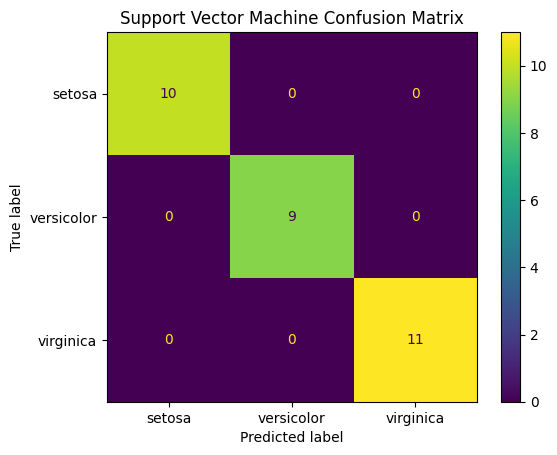

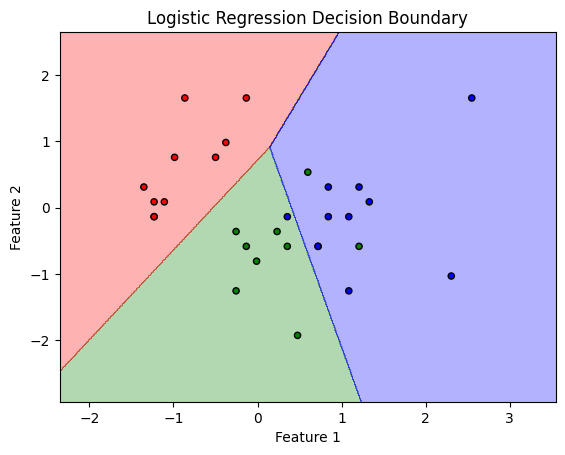

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Load and preprocess the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize feature distributions
sns.pairplot(data, hue='species')
plt.show()

# Train models
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

# Evaluate models
models = [logistic_regression, decision_tree, knn, svm]
model_names = ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors", "Support Vector Machine"]

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=iris.target_names)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Plot decision boundaries for Logistic Regression using the first two features
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
logistic_regression.fit(X_train_2d, y_train)
plot_decision_boundaries(X_test_2d, y_test, logistic_regression, "Logistic Regression Decision Boundary")
